# Linear Regression

In [212]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [142]:
df=pd.read_csv("C:/Users/HP/Downloads/1_2015.csv")
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [143]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [144]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

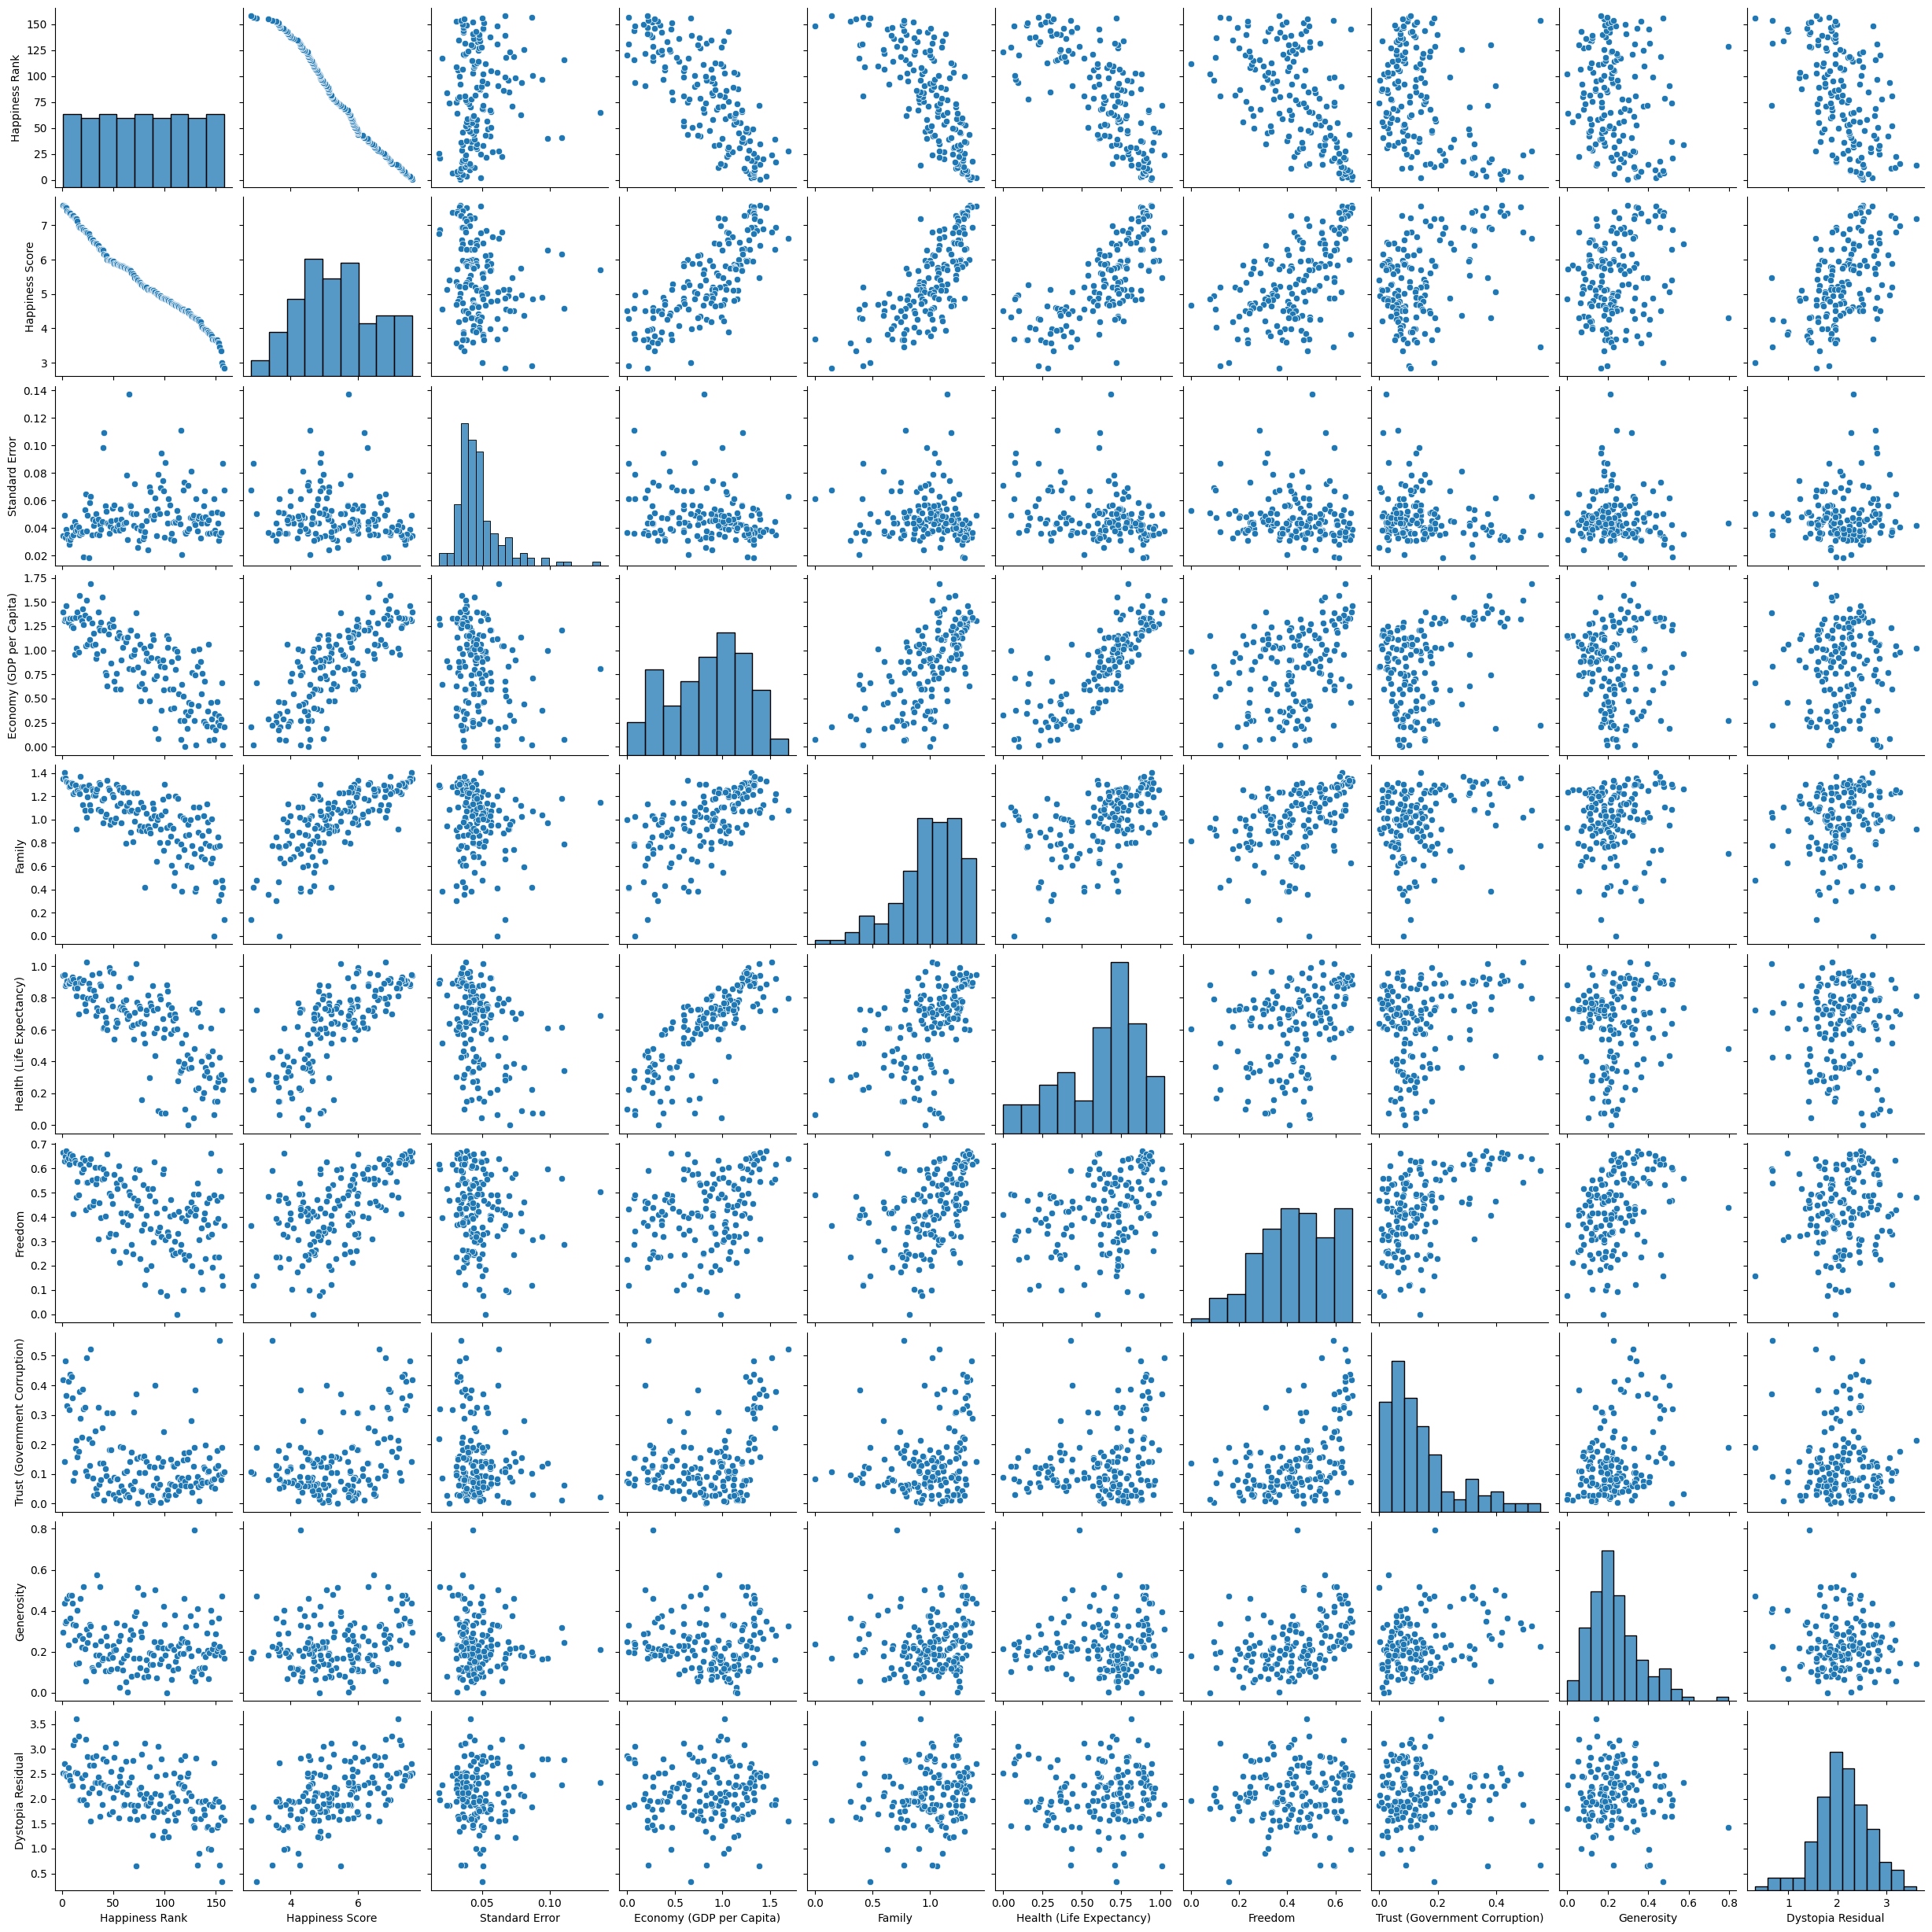

In [145]:
sns.pairplot(df)

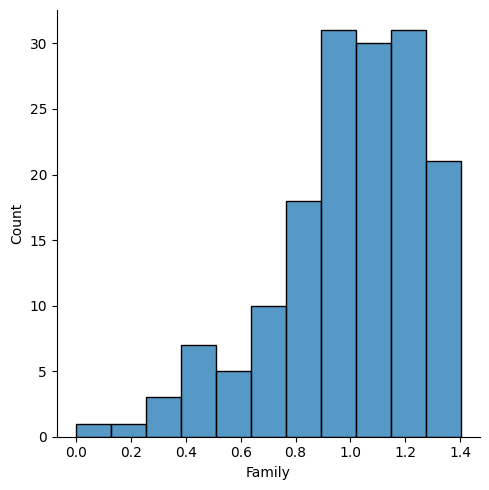

In [146]:
sns.displot(df['Family'])

In [147]:
df1=df[['Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual']]
df1

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...
153,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


<Axes: >

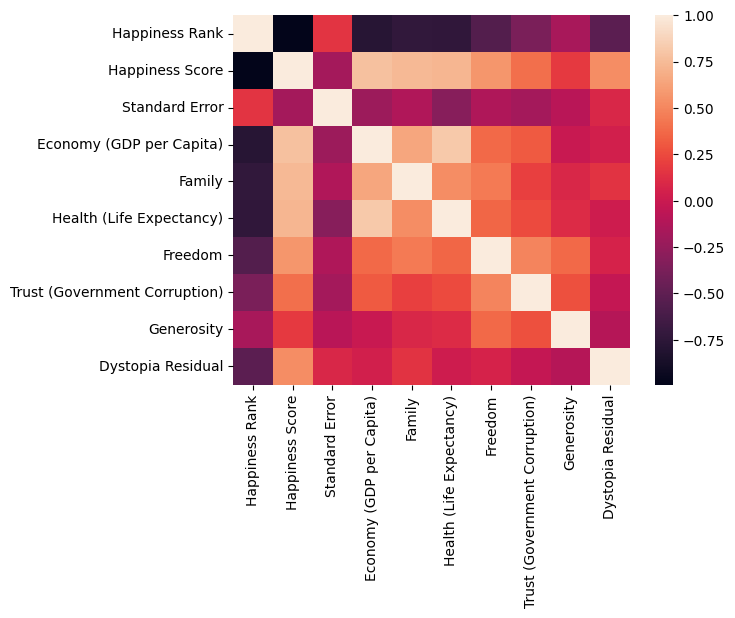

In [148]:
sns.heatmap(df1.corr())

# Model Building

In [149]:
x=df[['Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)','Health (Life Expectancy)','Freedom',
      'Trust (Government Corruption)','Generosity', 'Dystopia Residual']]
y=df['Family']

In [150]:
#pip install sklearn

In [151]:
#pip install scikit-learn

In [152]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

In [153]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [154]:
predx=lr.predict(x_test)
#predy=lr.predict(y_test)
print(predx)
#print(predx)

[0.70911168 0.74683839 0.86411654 1.23333069 0.81237393 1.10455172
 1.19757794 1.31969886 0.88580505 1.17257782 1.13974932 1.10405732
 1.00096502 1.15067925 0.91949298 0.95546879 0.99844271 1.28534507
 0.38618275 1.16623245 1.12218332 1.05854348 0.68124479 0.76034402
 1.01346013 1.30161075 0.38217304 0.89358873 1.20878995 1.25573732
 0.98525791 1.34055108 1.33087332 0.79307139 1.08729104 0.77723713
 0.62727936 0.74321666 1.24035749 0.66320017 0.90422803 0.54506804
 0.41437261 1.0536238  0.97448546 1.28950867 0.7967225  1.18392009]


In [155]:
print(lr.score(x_test,y_test))

0.9999984596971901


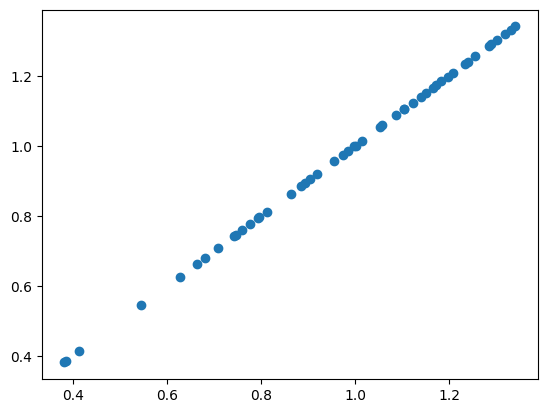

In [156]:
plt.scatter(y_test,predx)

In [157]:
dr=pd.read_csv("C:/Users/HP/Downloads/4_Drug200.csv")
dr

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [158]:
dr.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [159]:
dr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [160]:
dr.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [161]:
dr['BP'].value_counts()

BP
HIGH      77
LOW       64
NORMAL    59
Name: count, dtype: int64

In [162]:
BP={"BP":{"HIGH":2,"LOW":0,"NORMAL":1}}
dr=dr.replace(BP)
dr

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,2,HIGH,25.355,drugY
1,47,M,0,HIGH,13.093,drugC
2,47,M,0,HIGH,10.114,drugC
3,28,F,1,HIGH,7.798,drugX
4,61,F,0,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,0,HIGH,11.567,drugC
196,16,M,0,HIGH,12.006,drugC
197,52,M,1,HIGH,9.894,drugX
198,23,M,1,NORMAL,14.020,drugX


In [163]:
dr['Cholesterol'].value_counts()

Cholesterol
HIGH      103
NORMAL     97
Name: count, dtype: int64

In [164]:
Cholesterol={"Cholesterol":{"HIGH":1,"LOW":0,"NORMAL":1}}
dr=dr.replace(Cholesterol)
dr

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,2,1,25.355,drugY
1,47,M,0,1,13.093,drugC
2,47,M,0,1,10.114,drugC
3,28,F,1,1,7.798,drugX
4,61,F,0,1,18.043,drugY
...,...,...,...,...,...,...
195,56,F,0,1,11.567,drugC
196,16,M,0,1,12.006,drugC
197,52,M,1,1,9.894,drugX
198,23,M,1,1,14.020,drugX


In [165]:
dr=dr.drop(["Sex","Drug"],axis=1)
dr

,Age,BP,Cholesterol,Na_to_K
0,23,2,1,25.355
1,47,0,1,13.093
2,47,0,1,10.114
3,28,1,1,7.798
4,61,0,1,18.043
...,...,...,...,...
195,56,0,1,11.567
196,16,0,1,12.006
197,52,1,1,9.894
198,23,1,1,14.020


In [166]:
dr.columns

Index(['Age', 'BP', 'Cholesterol', 'Na_to_K'], dtype='object')

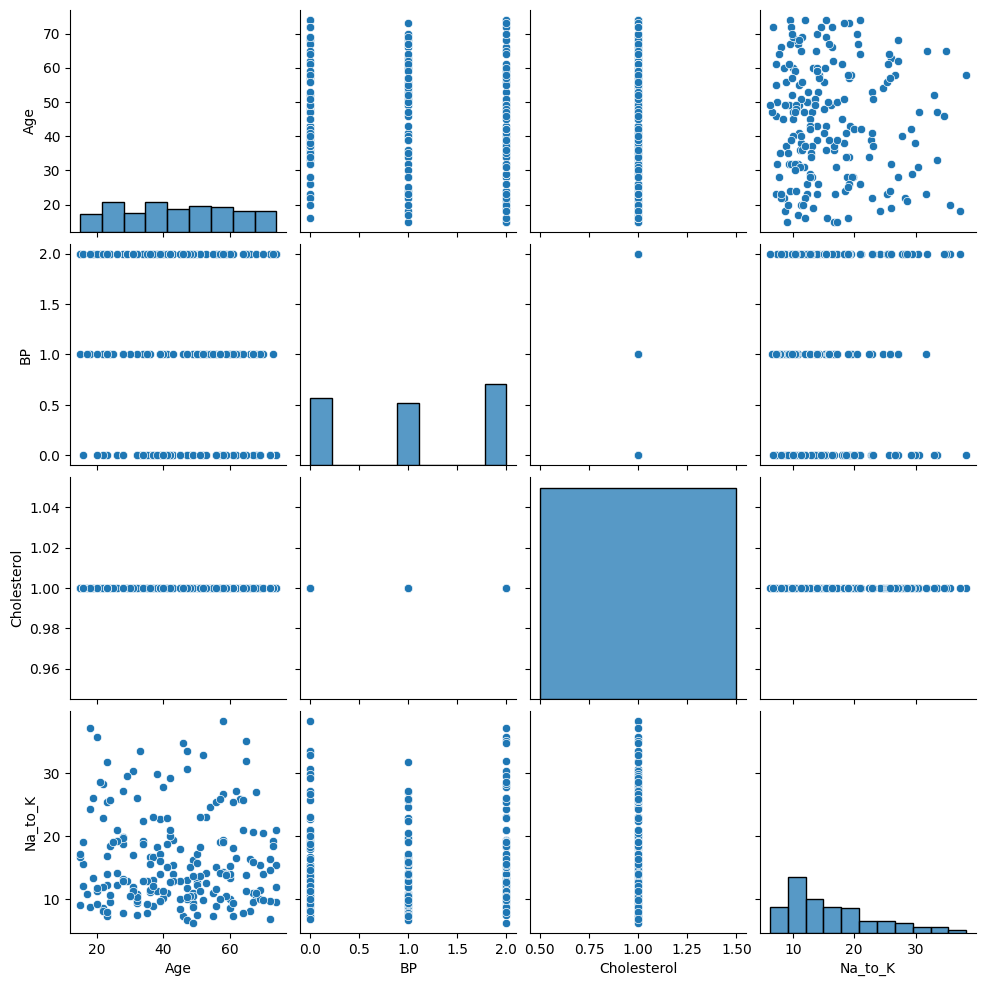

In [167]:
sns.pairplot(dr)

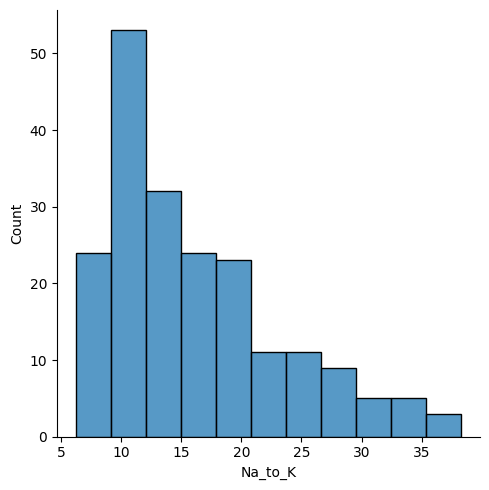

In [168]:
sns.displot(dr['Na_to_K'])

<Axes: >

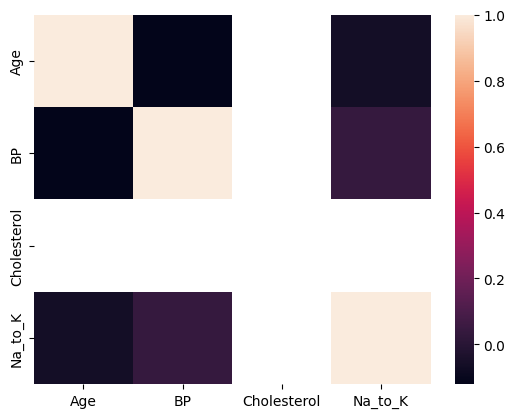

In [169]:
sns.heatmap(dr.corr())

# Model Building

In [170]:
x=dr[['Age','Cholesterol','Na_to_K']]
y=dr['BP']

In [171]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [172]:
predx=lr.predict(x_test)
#predy=lr.predict(y_test)
print(predx)
#print(predx)

[1.05582002 1.1510386  1.05610219 0.89770703 1.12085509 0.98431786
 0.96603317 1.07858397 1.35390852 1.03504676 1.22607291 0.9518726
 0.97038613 1.03559506 1.25316892 1.18027604 1.03074288 0.83437991
 0.80053796 0.92040418 1.02996302 1.13673452 1.02942874 1.29999436
 0.85503223 1.13147866 0.94071697 1.36861302 1.06846399 1.00829242
 1.25740274 1.06948346 0.87128936 0.97496746 1.07779182 1.14471252
 1.10351211 1.10333894 1.2379382  0.89023469 0.9724207  1.11238975
 1.10114455 1.31236483 0.93396562 1.13487208 0.88874246 1.03456816
 1.12945805 1.14394835 0.98531788 1.30359725 0.95207013 0.90314854
 0.89654675 1.237575   1.17130286 1.09717964 0.86535404 1.07541392]


In [173]:
print(lr.score(x_test,y_test))

-0.04623232062023619


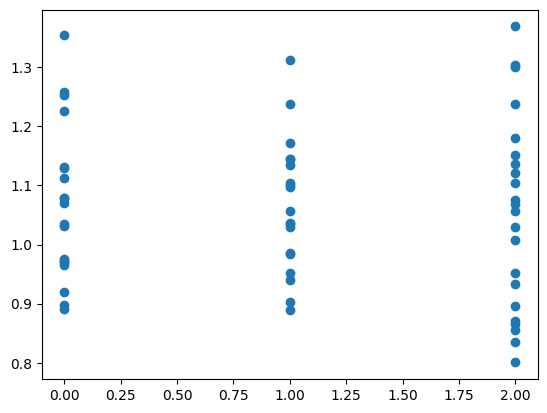

In [174]:
plt.scatter(y_test,predx)

In [175]:
dj=pd.read_csv("C:/Users/HP/Downloads/3_Fitness (1).csv")
dj

,SALESMAN,JAN,FEB,MAR,APR,MAY,JUN,TOTAL SALES,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,ANU,70.0,80.0,75.0,60.0,72.0,55.0,412.0,NaN,NaN,NaN,NaN
1,BABU,30.0,48.0,35.0,45.0,25.0,37.0,220.0,NaN,NaN,NaN,1. Individual Sales using Sum()
2,CHANDRU,65.0,54.0,49.0,54.0,35.0,65.0,322.0,NaN,NaN,NaN,2. Find the pattern trend using conditional fo...
3,DAVID,85.0,71.0,68.0,77.0,88.0,73.0,462.0,NaN,NaN,NaN,3. Analyze using Pivot table as column percentage
4,EINSTEIN,55.0,25.0,45.0,50.0,53.0,30.0,258.0,NaN,NaN,NaN,4. Insert Pivot charts
5,FAROOK,35.0,45.0,15.0,45.0,45.0,25.0,210.0,NaN,NaN,NaN,5. Rank() - returns the rank of a given value ...
6,GOWTHAM,75.0,66.0,59.0,65.0,56.0,30.0,351.0,NaN,NaN,NaN,NaN
7,HARSHITH,29.0,35.0,49.0,48.0,35.0,55.0,247.0,NaN,NaN,NaN,33
8,INIYAN,35.0,35.0,50.0,59.0,67.0,73.0,319.0,NaN,NaN,NaN,NaN
9,JOHN,77.0,85.0,77.0,68.0,56.0,25.0,388.0,NaN,NaN,NaN,NaN


In [176]:
dj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SALESMAN     11 non-null     object 
 1   JAN          11 non-null     float64
 2   FEB          11 non-null     float64
 3   MAR          11 non-null     float64
 4   APR          11 non-null     float64
 5   MAY          11 non-null     float64
 6   JUN          11 non-null     float64
 7   TOTAL SALES  11 non-null     float64
 8   Unnamed: 8   1 non-null      float64
 9   Unnamed: 9   0 non-null      float64
 10  Unnamed: 10  0 non-null      float64
 11  Unnamed: 11  6 non-null      object 
dtypes: float64(10), object(2)
memory usage: 1.3+ KB


In [177]:
dj.describe()

,JAN,FEB,MAR,APR,MAY,JUN,TOTAL SALES,Unnamed: 8,Unnamed: 9,Unnamed: 10
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,1.0,0.0,0.0
mean,101.090909,98.909091,94.909091,103.818182,96.727273,85.090909,579.818182,3193.0,NaN,NaN
std,152.263886,148.884153,142.770763,155.277054,145.500578,128.347540,869.142775,NaN,NaN,NaN
min,29.000000,25.000000,15.000000,45.000000,25.000000,25.000000,210.000000,3193.0,NaN,NaN
25%,35.000000,40.000000,47.000000,49.000000,40.000000,30.000000,252.500000,3193.0,NaN,NaN
50%,65.000000,54.000000,50.000000,59.000000,56.000000,55.000000,322.000000,3193.0,NaN,NaN
75%,76.000000,75.500000,71.500000,66.500000,69.500000,69.000000,400.000000,3193.0,NaN,NaN
max,556.000000,544.000000,522.000000,571.000000,532.000000,468.000000,3189.000000,3193.0,NaN,NaN


In [178]:
dj.head()

,SALESMAN,JAN,FEB,MAR,APR,MAY,JUN,TOTAL SALES,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,ANU,70.0,80.0,75.0,60.0,72.0,55.0,412.0,NaN,NaN,NaN,NaN
1,BABU,30.0,48.0,35.0,45.0,25.0,37.0,220.0,NaN,NaN,NaN,1. Individual Sales using Sum()
2,CHANDRU,65.0,54.0,49.0,54.0,35.0,65.0,322.0,NaN,NaN,NaN,2. Find the pattern trend using conditional fo...
3,DAVID,85.0,71.0,68.0,77.0,88.0,73.0,462.0,NaN,NaN,NaN,3. Analyze using Pivot table as column percentage
4,EINSTEIN,55.0,25.0,45.0,50.0,53.0,30.0,258.0,NaN,NaN,NaN,4. Insert Pivot charts


In [179]:
dj.tail(10)

,SALESMAN,JAN,FEB,MAR,APR,MAY,JUN,TOTAL SALES,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
2,CHANDRU,65.0,54.0,49.0,54.0,35.0,65.0,322.0,NaN,NaN,NaN,2. Find the pattern trend using conditional fo...
3,DAVID,85.0,71.0,68.0,77.0,88.0,73.0,462.0,NaN,NaN,NaN,3. Analyze using Pivot table as column percentage
4,EINSTEIN,55.0,25.0,45.0,50.0,53.0,30.0,258.0,NaN,NaN,NaN,4. Insert Pivot charts
5,FAROOK,35.0,45.0,15.0,45.0,45.0,25.0,210.0,NaN,NaN,NaN,5. Rank() - returns the rank of a given value ...
6,GOWTHAM,75.0,66.0,59.0,65.0,56.0,30.0,351.0,NaN,NaN,NaN,NaN
7,HARSHITH,29.0,35.0,49.0,48.0,35.0,55.0,247.0,NaN,NaN,NaN,33
8,INIYAN,35.0,35.0,50.0,59.0,67.0,73.0,319.0,NaN,NaN,NaN,NaN
9,JOHN,77.0,85.0,77.0,68.0,56.0,25.0,388.0,NaN,NaN,NaN,NaN
10,MONTHLY SALES,556.0,544.0,522.0,571.0,532.0,468.0,NaN,3193.0,NaN,NaN,NaN
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3189.0,NaN,NaN,NaN,NaN


In [180]:
dj.columns

Index(['SALESMAN', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'TOTAL SALES',
       'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11'],
      dtype='object')

# Random Forest Classifier

In [181]:
dy=pd.read_csv("C:/Users/HP/Downloads/C1_Ionosphere.csv")
dy

,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.1,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
0,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
1,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
2,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
3,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
4,1,0,0.02337,-0.00592,-0.09924,-0.11949,-0.00763,-0.11824,0.14706,0.06637,...,-0.01535,-0.03240,0.09223,-0.07859,0.00732,0.00000,0.00000,-0.00039,0.12011,b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,g
346,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,g
347,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,g
348,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,g


In [182]:
dy.describe()

,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.1,0.03760,...,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300
count,350.000000,350.0,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,...,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,0.891429,0.0,0.640330,0.044667,0.600350,0.116154,0.549284,0.120779,0.510453,0.181756,...,0.395643,-0.069928,0.542015,-0.068417,0.378919,-0.027013,0.352313,-0.002248,0.349829,0.015816
std,0.311546,0.0,0.498059,0.442032,0.520431,0.461443,0.493124,0.520816,0.507117,0.484482,...,0.579206,0.508675,0.516896,0.550411,0.576642,0.508425,0.572289,0.513491,0.523339,0.468338
min,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.0,0.471517,-0.065388,0.412555,-0.024868,0.209105,-0.053483,0.086785,-0.049003,...,0.000000,-0.323745,0.283612,-0.428992,0.000000,-0.234935,0.000000,-0.239347,0.000000,-0.161013
50%,1.000000,0.0,0.870795,0.016700,0.808620,0.021170,0.728000,0.015085,0.682430,0.017550,...,0.549175,-0.014915,0.708530,-0.017685,0.499215,0.000000,0.446875,0.000000,0.413115,0.000000
75%,1.000000,0.0,1.000000,0.194727,1.000000,0.335317,0.970445,0.451572,0.950555,0.536192,...,0.907165,0.157922,0.999972,0.154862,0.884572,0.154218,0.859490,0.200935,0.816778,0.172105
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [183]:
dy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 35 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   1          350 non-null    int64  
 1   0          350 non-null    int64  
 2   0.99539    350 non-null    float64
 3   -0.05889   350 non-null    float64
 4   0.85243    350 non-null    float64
 5   0.02306    350 non-null    float64
 6   0.83398    350 non-null    float64
 7   -0.37708   350 non-null    float64
 8   1.1        350 non-null    float64
 9   0.03760    350 non-null    float64
 10  0.85243.1  350 non-null    float64
 11  -0.17755   350 non-null    float64
 12  0.59755    350 non-null    float64
 13  -0.44945   350 non-null    float64
 14  0.60536    350 non-null    float64
 15  -0.38223   350 non-null    float64
 16  0.84356    350 non-null    float64
 17  -0.38542   350 non-null    float64
 18  0.58212    350 non-null    float64
 19  -0.32192   350 non-null    float64
 20  0.56971   

In [184]:
dy.head()

,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.1,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
0,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
1,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
2,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
3,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
4,1,0,0.02337,-0.00592,-0.09924,-0.11949,-0.00763,-0.11824,0.14706,0.06637,...,-0.01535,-0.03240,0.09223,-0.07859,0.00732,0.00000,0.00000,-0.00039,0.12011,b


In [185]:
dy.tail()

,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.1,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
345,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,g
346,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,g
347,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,g
348,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,g
349,1,0,0.84710,0.13533,0.73638,-0.06151,0.87873,0.08260,0.88928,-0.09139,...,-0.15114,0.81147,-0.04822,0.78207,-0.00703,0.75747,-0.06678,0.85764,-0.06151,g


In [186]:
dy['g'].value_counts()

g
g    224
b    126
Name: count, dtype: int64

In [187]:
g = {"g":{"g":1,"b":2}}
dy = dy.replace(g)
dy

,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.1,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
0,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,2
1,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,1
2,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,2
3,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,1
4,1,0,0.02337,-0.00592,-0.09924,-0.11949,-0.00763,-0.11824,0.14706,0.06637,...,-0.01535,-0.03240,0.09223,-0.07859,0.00732,0.00000,0.00000,-0.00039,0.12011,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,1
346,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,1
347,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,1
348,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,1


In [188]:
x = dy.drop("g",axis=1)
y = dy["g"]

In [189]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.40)

In [190]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)


RandomForestClassifier()

In [191]:
rf = RandomForestClassifier()

In [192]:
params = {"max_depth":[1,2,3,4,5],
 "min_samples_leaf":[2,4,6,8,10],
 "n_estimators":[1,3,5,7]
 }

In [193]:
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(estimator=rf,param_grid=params,cv=2,scoring='accuracy')
gs.fit(x_train,y_train)


GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [2, 4, 6, 8, 10],
                         'n_estimators': [1, 3, 5, 7]},
             scoring='accuracy')

In [194]:
rf_best = gs.best_estimator_
rf_best

RandomForestClassifier(max_depth=3, min_samples_leaf=2, n_estimators=5)

In [195]:
ac = gs.score(x_test,y_test)
ac 

0.8928571428571429

[Text(0.5416666666666666, 0.875, 'x[32] <= 0.01\ngini = 0.464\nsamples = 138\nvalue = [133, 77]\nclass = Yes'),
 Text(0.3333333333333333, 0.625, 'x[26] <= -0.15\ngini = 0.459\nsamples = 45\nvalue = [26, 47]\nclass = No'),
 Text(0.16666666666666666, 0.375, 'x[3] <= 0.049\ngini = 0.32\nsamples = 16\nvalue = [20, 5]\nclass = Yes'),
 Text(0.08333333333333333, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 4]\nclass = No'),
 Text(0.25, 0.125, 'gini = 0.091\nsamples = 13\nvalue = [20, 1]\nclass = Yes'),
 Text(0.5, 0.375, 'x[16] <= -0.602\ngini = 0.219\nsamples = 29\nvalue = [6, 42]\nclass = No'),
 Text(0.4166666666666667, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [4, 0]\nclass = Yes'),
 Text(0.5833333333333334, 0.125, 'gini = 0.087\nsamples = 27\nvalue = [2, 42]\nclass = No'),
 Text(0.75, 0.625, 'x[30] <= -0.401\ngini = 0.342\nsamples = 93\nvalue = [107, 30]\nclass = Yes'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 5\nvalue = [0, 9]\nclass = No'),
 Text(0.8333333333333334, 0.375, 

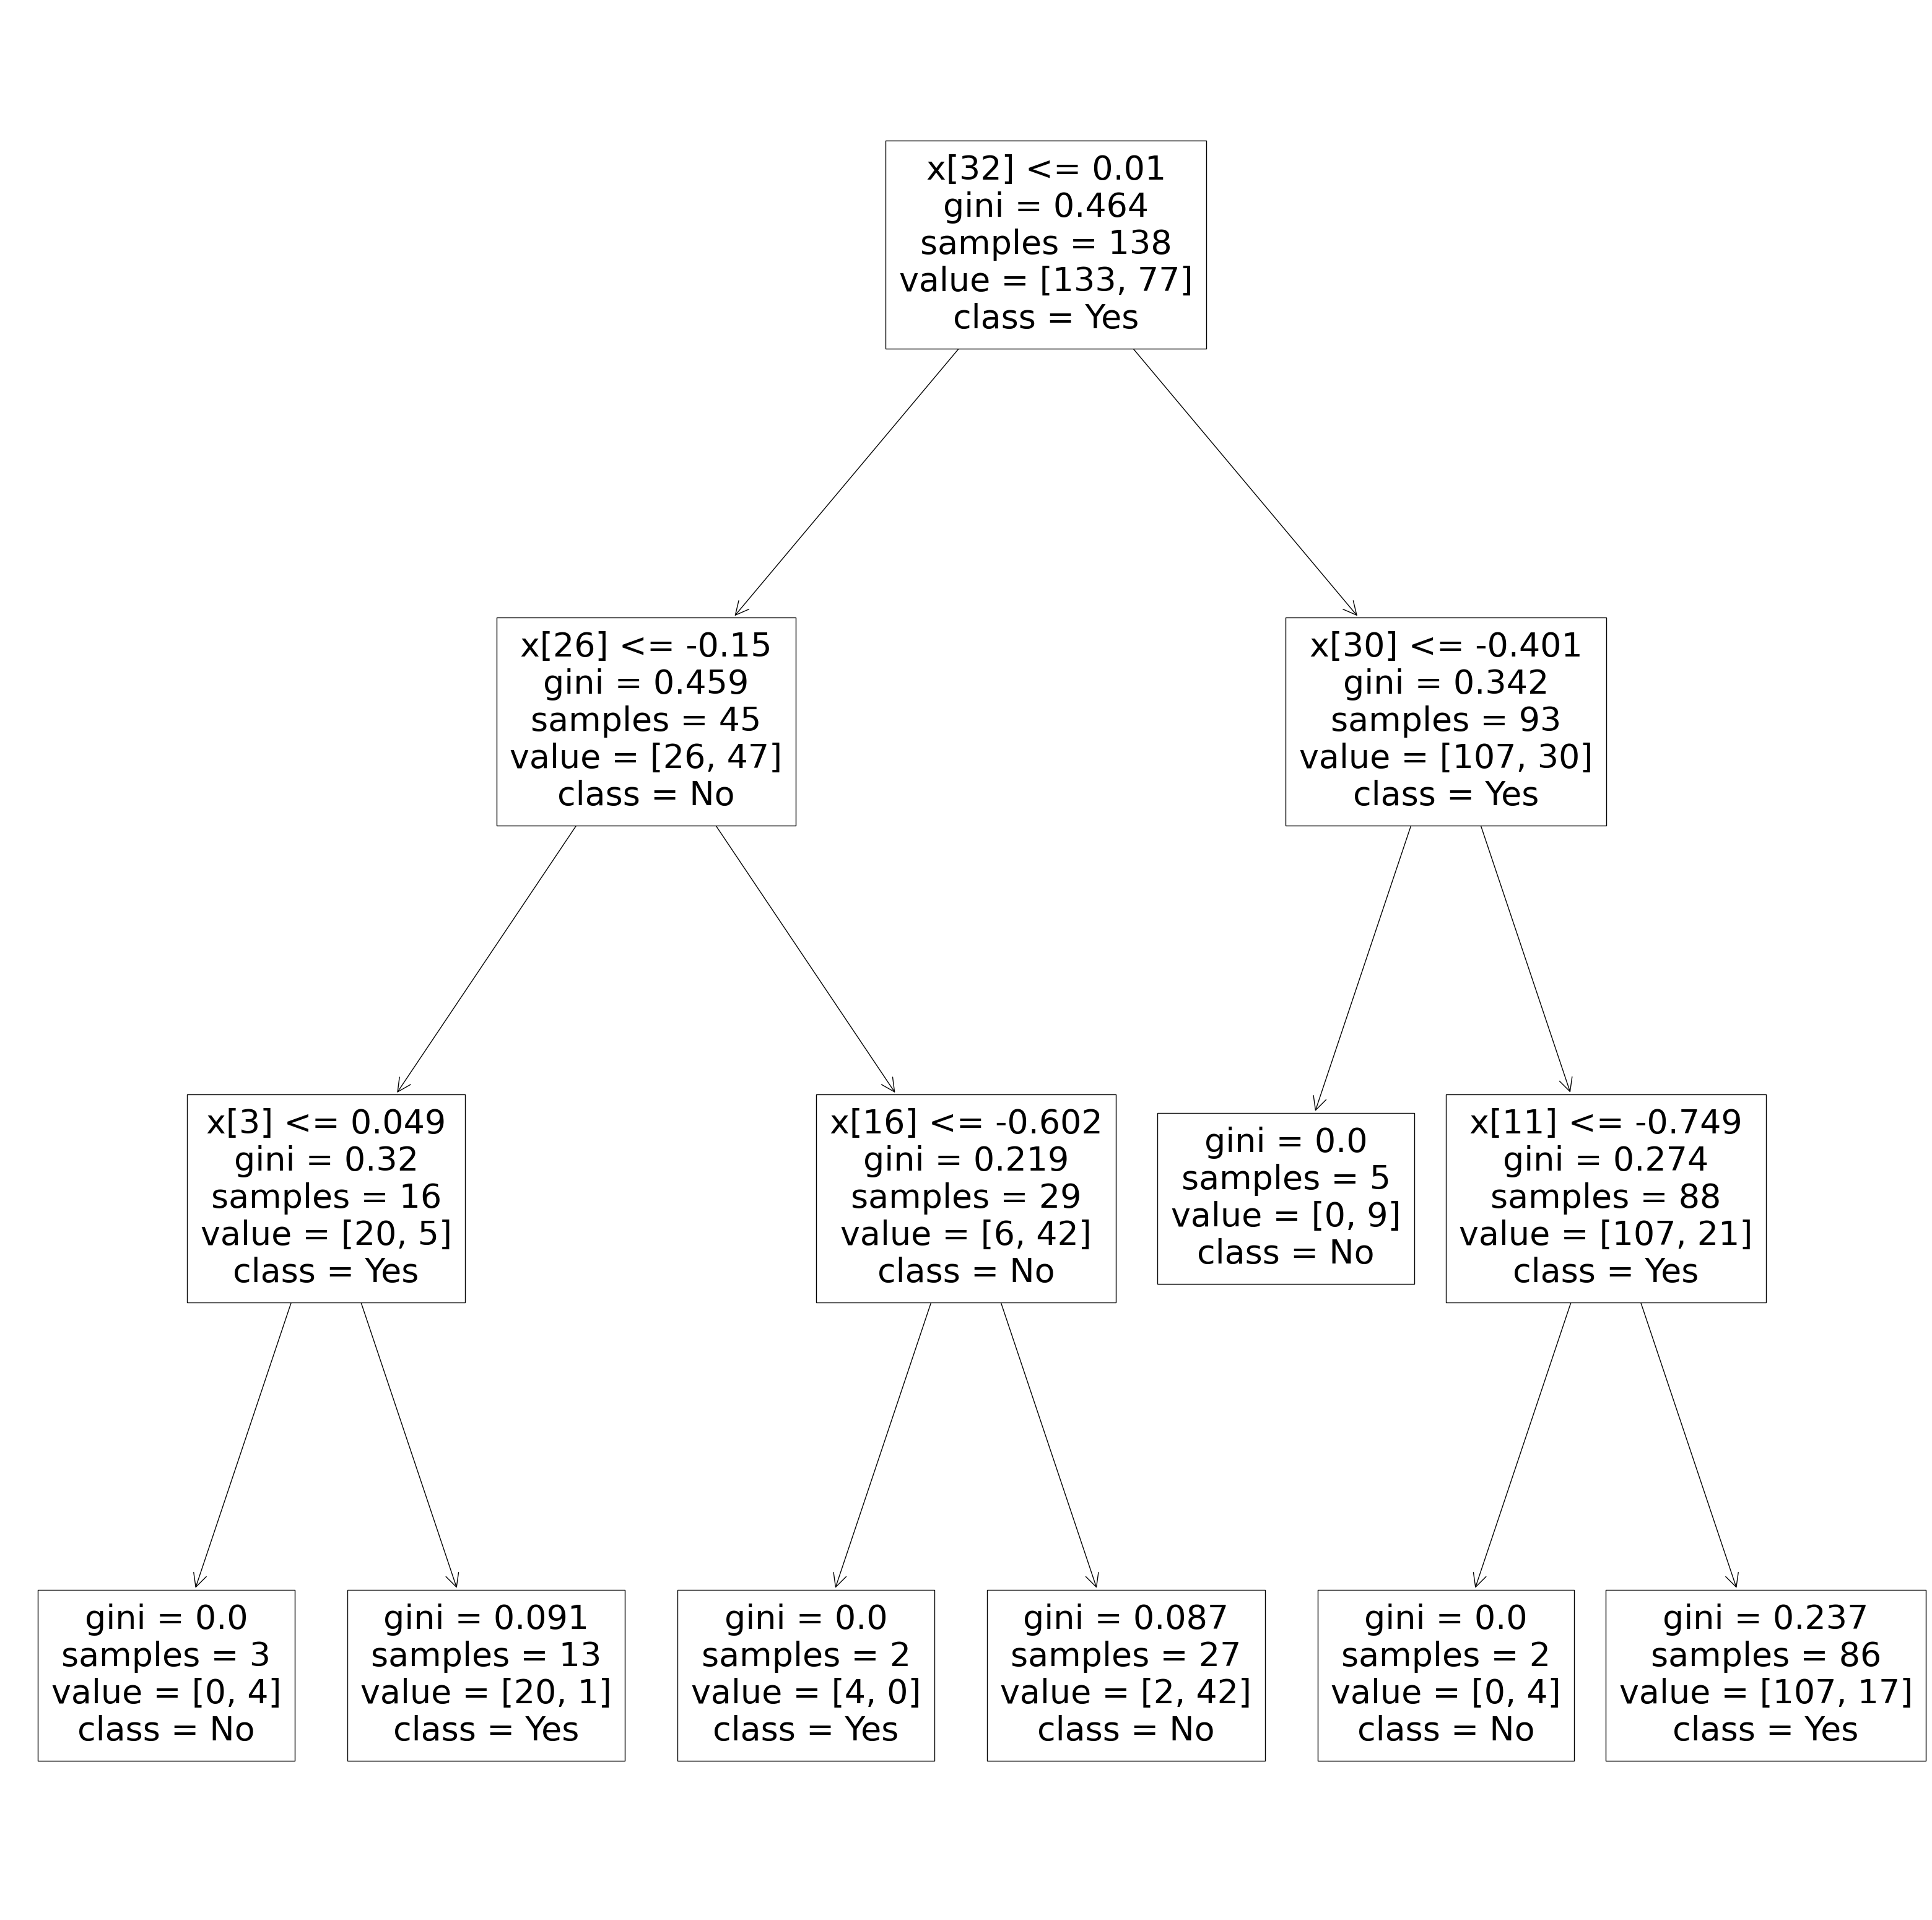

In [196]:
from sklearn.tree import plot_tree
plt.figure(figsize=(40,40))
plot_tree(rf_best.estimators_[4],feature_names=None,class_names=['Yes','No'])

In [197]:
dh=pd.read_csv("C:/Users/HP/Downloads/C10_Loan1.csv")
dh

,Home Owner,Marital Status,Annual Income,Defaulted Borrower
0,Yes,Single,125,No
1,No,Married,100,No
2,No,Single,70,No
3,Yes,Married,120,No
4,No,Divorced,95,Yes
5,No,Married,60,No
6,Yes,Divorced,220,No
7,No,Single,85,Yes
8,No,Married,75,No
9,No,Single,90,Yes


In [198]:
Home_Owner = {"Home Owner":{"Yes":1,"No":0}}
dh = dh.replace(Home_Owner)
Defaulted_Borrower={"Defaulted Borrower":{"Yes":1,"No":0}}
dh=dh.replace(Defaulted_Borrower)
Marital_Status={"Marital Status":{"Single":1,"Divorced":0,"Married":2}}
dh=dh.replace(Marital_Status)
dh

,Home Owner,Marital Status,Annual Income,Defaulted Borrower
0,1,1,125,0
1,0,2,100,0
2,0,1,70,0
3,1,2,120,0
4,0,0,95,1
5,0,2,60,0
6,1,0,220,0
7,0,1,85,1
8,0,2,75,0
9,0,1,90,1


In [199]:
dh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Home Owner          10 non-null     int64
 1   Marital Status      10 non-null     int64
 2   Annual Income       10 non-null     int64
 3   Defaulted Borrower  10 non-null     int64
dtypes: int64(4)
memory usage: 452.0 bytes


In [200]:
dh.describe()

,Home Owner,Marital Status,Annual Income,Defaulted Borrower
count,10.000000,10.000000,10.000000,10.000000
mean,0.300000,1.200000,104.000000,0.300000
std,0.483046,0.788811,45.631373,0.483046
min,0.000000,0.000000,60.000000,0.000000
25%,0.000000,1.000000,77.500000,0.000000
50%,0.000000,1.000000,92.500000,0.000000
75%,0.750000,2.000000,115.000000,0.750000
max,1.000000,2.000000,220.000000,1.000000


In [201]:
dh.head()

,Home Owner,Marital Status,Annual Income,Defaulted Borrower
0,1,1,125,0
1,0,2,100,0
2,0,1,70,0
3,1,2,120,0
4,0,0,95,1


In [202]:
dh.tail()

,Home Owner,Marital Status,Annual Income,Defaulted Borrower
5,0,2,60,0
6,1,0,220,0
7,0,1,85,1
8,0,2,75,0
9,0,1,90,1


In [203]:
x = dh.drop("Home Owner",axis=1)
y = dh["Home Owner"]

In [204]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.40)

In [205]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [206]:
rf = RandomForestClassifier()

In [207]:
params = {"max_depth":[1,2,3,4,5],
 "min_samples_leaf":[2,4,6,8,10],
 "n_estimators":[1,3,5,7,11]
 }

In [208]:
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(estimator=rf,param_grid=params,cv=2,scoring='accuracy')
gs.fit(x_train,y_train)


GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [2, 4, 6, 8, 10],
                         'n_estimators': [1, 3, 5, 7, 11]},
             scoring='accuracy')

In [209]:
rf_best = gs.best_estimator_
rf_best

RandomForestClassifier(max_depth=1, min_samples_leaf=2, n_estimators=5)

In [210]:
ac = gs.score(x_test,y_test)
ac 

1.0

[Text(0.5, 0.75, 'x[1] <= 90.0\ngini = 0.278\nsamples = 4\nvalue = [5, 1]\nclass = Yes'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [4, 0]\nclass = Yes'),
 Text(0.75, 0.25, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = Yes')]

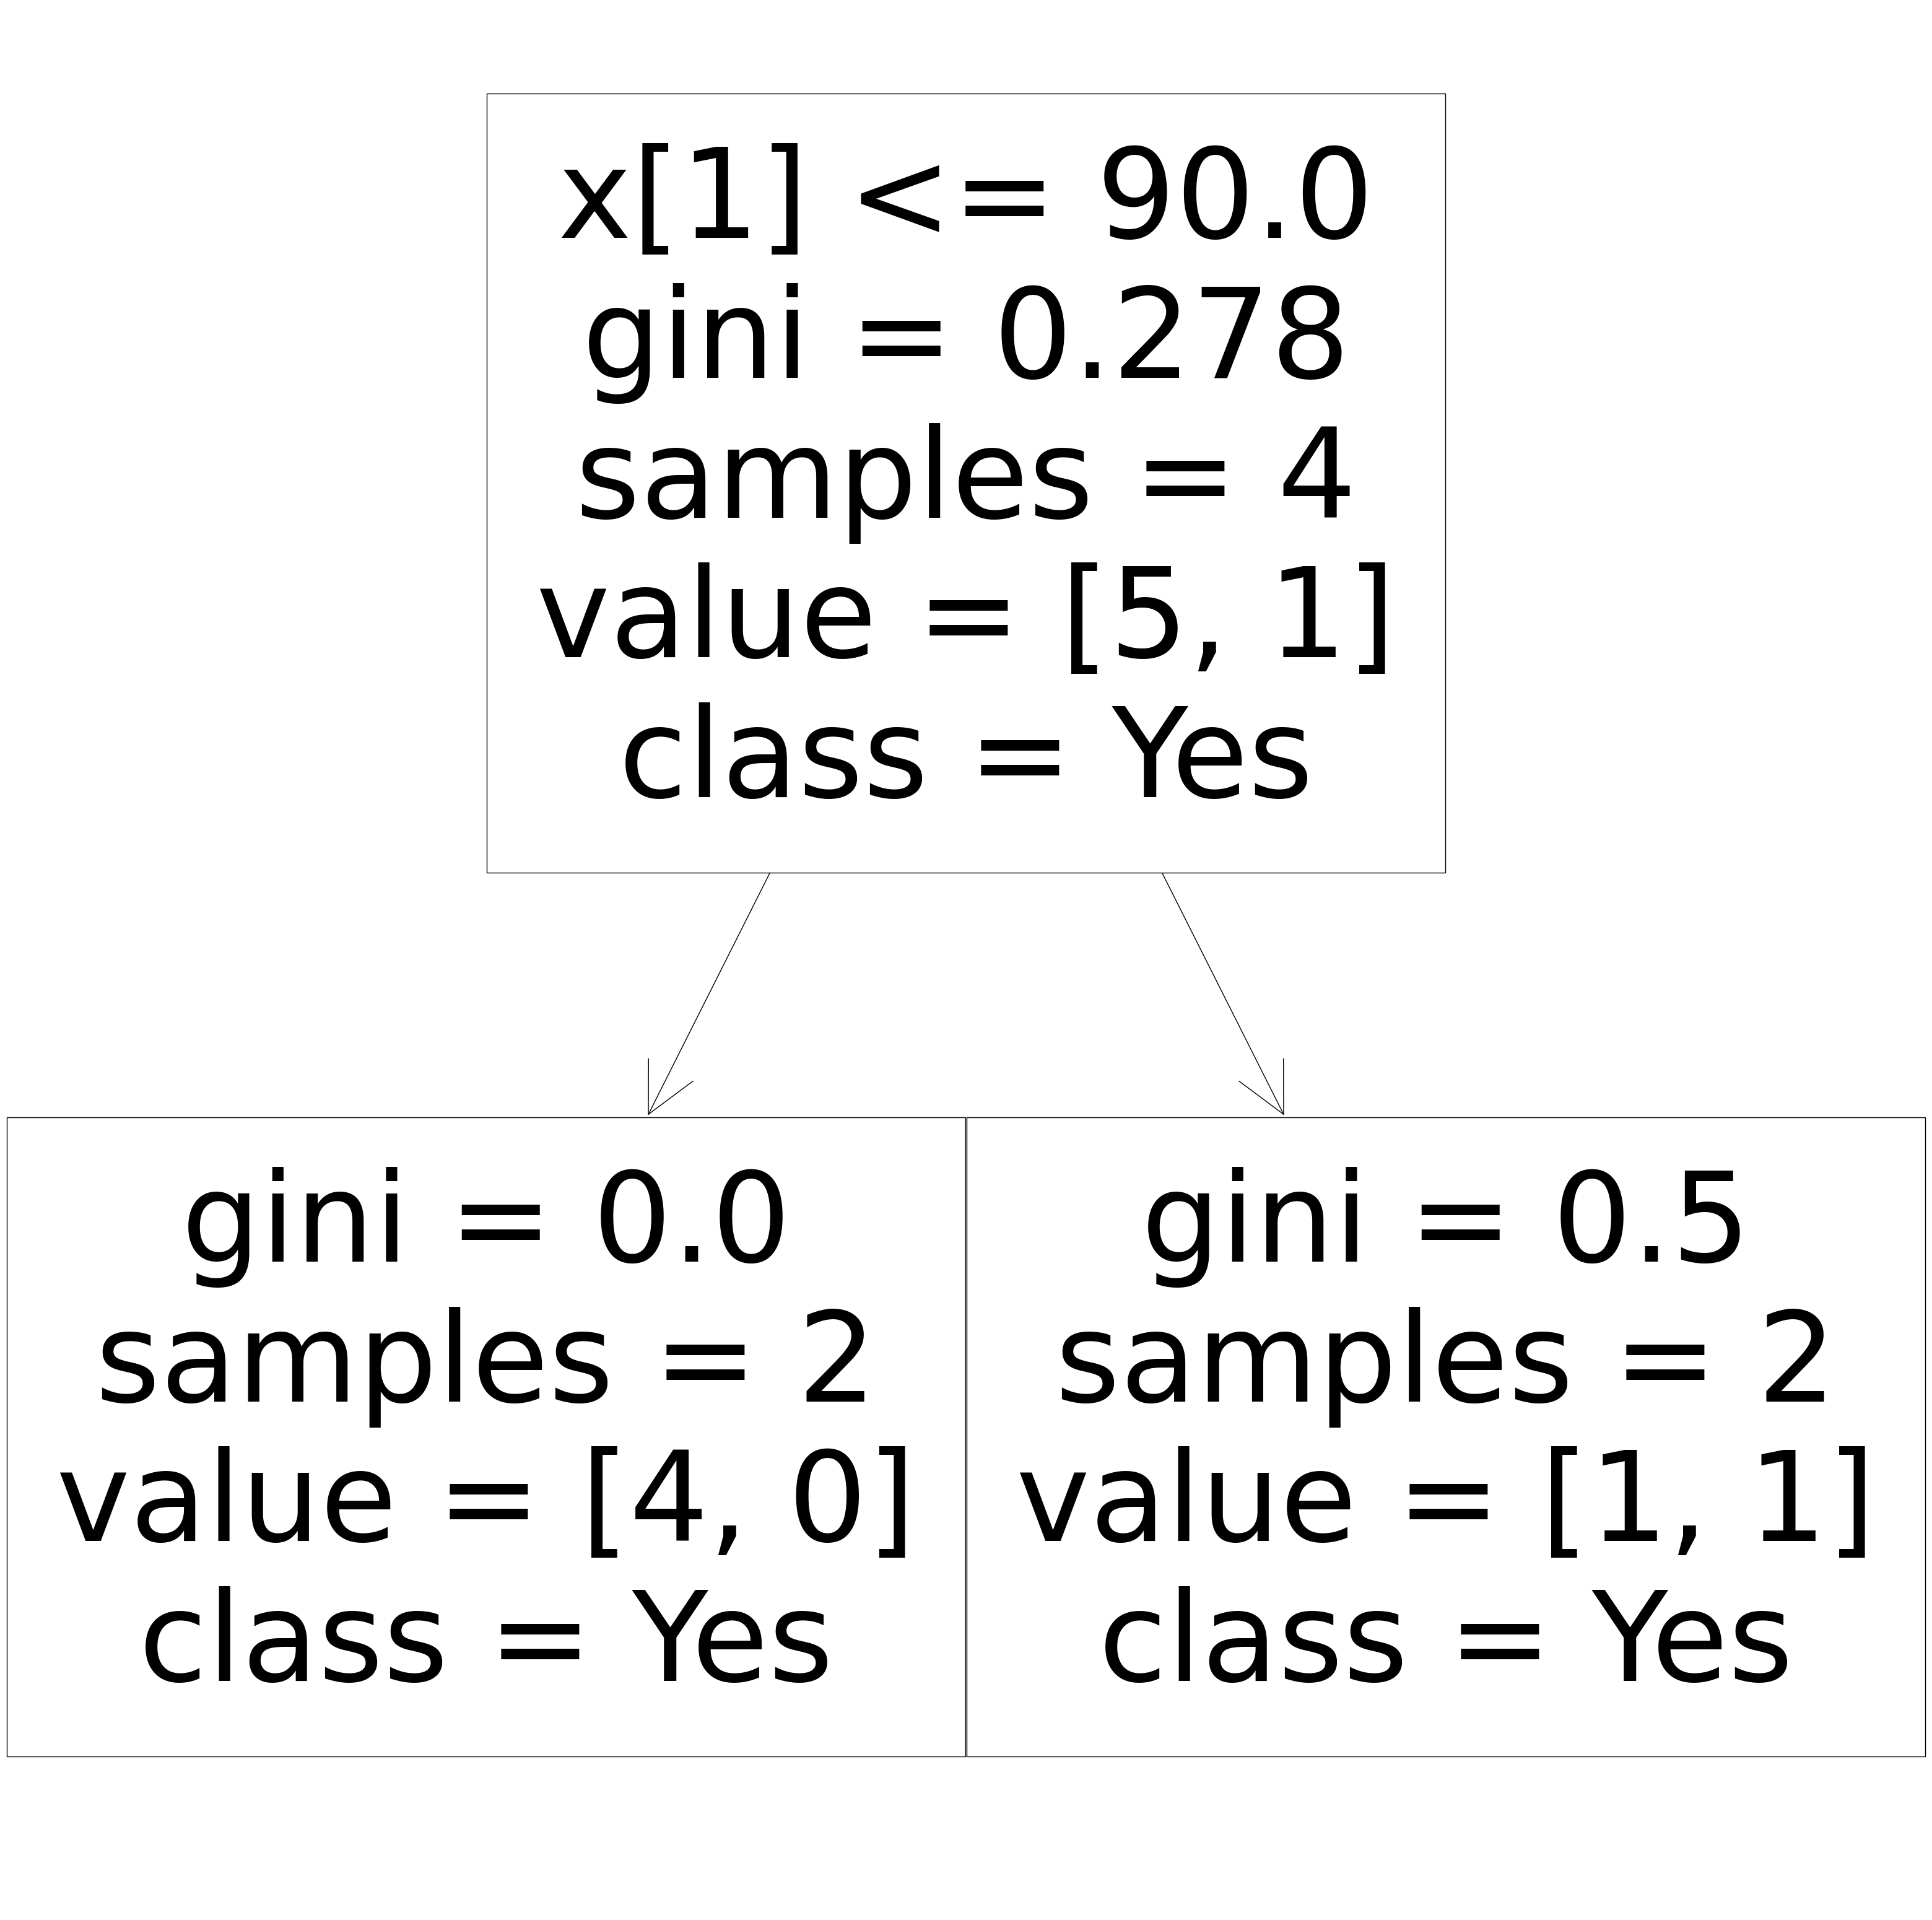

In [211]:
from sklearn.tree import plot_tree
plt.figure(figsize=(40,40))
plot_tree(rf_best.estimators_[4],feature_names=None,class_names=['Yes','No'])
